## Set environment

In [5]:
#Mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

# Enter the repo directory on google colaboratory.
%cd /content/drive/MyDrive/shape-recognition/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/shape-recognition


In [6]:
# Install packages
%pip install -r requirements.txt

## Training

In [7]:
!wandb disabled

W&B disabled.


In [8]:
!python train.py --data configs/data-3.yaml --epochs 10 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --name data-3 --workers 2 --no-mosaic --device cuda --imgsz 1024

2023-06-29 10:54:15.753107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 10:54:17.076779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1000
Number of validation samples: 100

Building model from scratch...
Layer (type (var_name))                            Output Shape              Param #
FasterRCNN (FasterRCNN)                            [100, 4]                  --
├─GeneralizedRCNNTransform (transform)             [2, 3, 800, 800]          --
├─BackboneWithFPN (backbone)                       [2, 256, 13, 13]          --
│    └─IntermediateLayerGetter (body)              [2, 2048, 25, 25]   

In [9]:
#!python train.py --data configs/data-3.yaml --resume-training --weights outputs/training/data-3/last_model.pth --epochs 10 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --name data-3 --workers 2 --no-mosaic --device cuda --imgsz 1024

## Visualize Validation Results

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

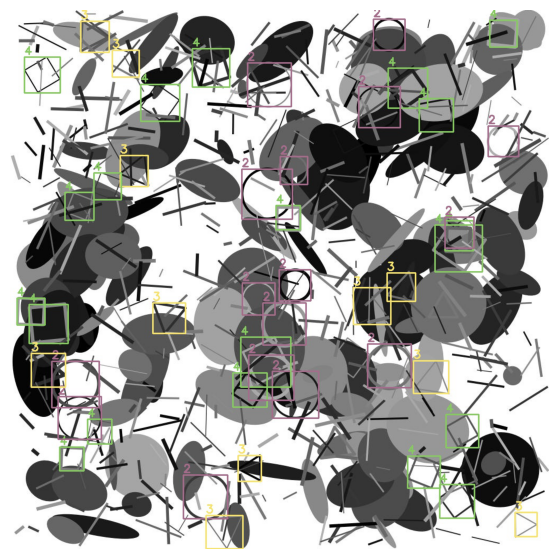

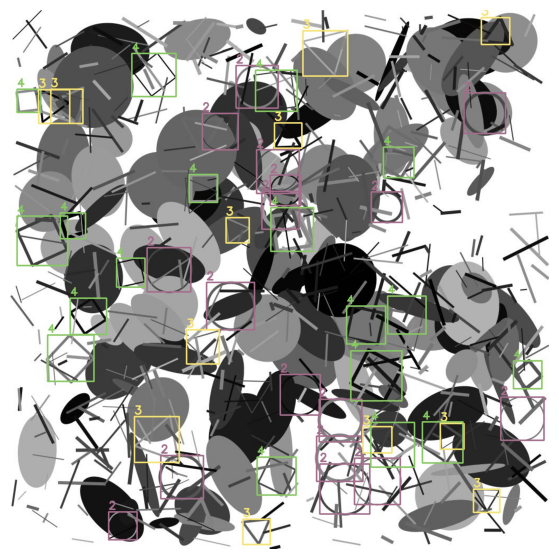

In [ ]:
results_dir_path = './outputs/training/data-3'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Evaluation on Test Set

In [ ]:
# Verbose mAP.
!python eval.py --weights outputs/training/data-3/best_model.pth --data configs/data-3.yaml --model fasterrcnn_resnet50_fpn_v2 --workers 2 --verbose --imgsz 1024

2023-06-27 21:17:52.643200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 21:17:53.710504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100% 13/13 [00:16<00:00,  1.26s/it]
counter = 13
3
{'boxes': tensor([[  22.6215,  342.0739,  118.6908,  435.3401],
        [  62.3662,  772.9071,  155.5677,  867.0213],
        [ 793.2788,  325.8959,  885.0587,  417.1166],
        [ 131.1441,  283.0517,  187.2286,  339.2588],
        [  10.1795,  786.5977,  106.6451,  882.4164],
        [ 925.8235,  139.9489,  980.1555,  195.6038],
        [ 856.8614,  805.9842,  949.4470,  899.3645],
        [ 387.4647,  515.1146,  454.4121,  579.0462],
        [ 650.3546,  563.0184,  717.9704,  631.0159],
        [ 615.080

## Evaluation on other Test Data

In [ ]:
!python eval.py --weights outputs/training/data-3/best_model.pth --data configs/data-0.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose --imgsz 1024

In [ ]:
!python eval.py --weights outputs/training/data-3/best_model.pth --data configs/data-1.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose --imgsz 1024

In [ ]:
!python eval.py --weights outputs/training/data-3/best_model.pth --data configs/data-2.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose --imgsz 1024